# **LAB: PyTorch MNIST**

Dong Gyun Ko <br>

Last Updated: March 3, 2023 <br>

# **1. Import Modules**

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

plt.style.use('default')

# **2. Preprocessing Set**
- `transform.Compose`

In [3]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, ), (0.5, ))]) # N(0.5, 0.5^2)

# **3. Load anc Check the Data**

In [4]:
trainset = torchvision.datasets.MNIST(root='./data', 
                                      train=True, 
                                      download=True, 
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='./data', 
                                     train=False, 
                                     download=True, 
                                     transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
train_loader = DataLoader(trainset, 
                          batch_size=128, 
                          shuffle=True, 
                          num_workers=2)

test_loader = DataLoader(testset, 
                         batch_size=128, 
                         shuffle=False, 
                         num_workers=2)

In [10]:
image, label = next(iter(train_loader))

In [11]:
image.shape, label.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [12]:
def imshow(img):
    
    img = img/2 +0.5
    npimg = img.numpy()
    fig = plt.figure(figsize=(10, 5))

    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    plt.show()

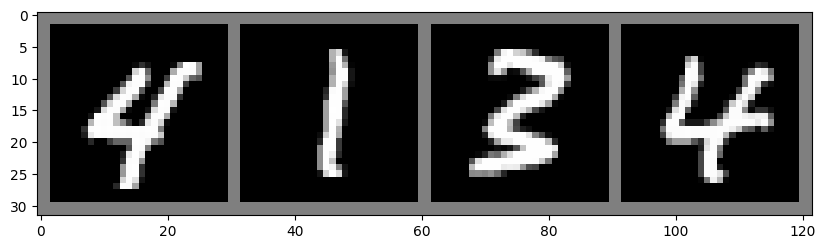

In [19]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))

# **4. Contruct the Neural Networks**##

In [22]:
class Net(nn.Module):
      
      def __init__(self):

          super(Net, self).__init__()

          self.conv1 = nn.Conv2d(1, 6, 3)
          self.conv2 = nn.Conv2d(6, 16, 3)
          self.fc1 = nn.Linear(16 * 5 * 5, 120)
          self.fc2 = nn.Linear(120, 84)
          self.fc3 = nn.Linear(84, 10)
          
      def forward(self, x):

          x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
          x = F.max_pool2d(F.relu(self.conv2(x)), 2)
          x = x.view(-1, self.num_flat_features(x))
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)

          return x
      
      def num_flat_features(self, x):

          size = x.size()[1:]
          num_features = 1
          
          for s in size:

              num_features *= s

          return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


- `.parameters()` 

In [23]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # 1st layer

10
torch.Size([6, 1, 3, 3])


check the forward propagation values (random inputs)

In [24]:
input = torch.randn(1, 1, 28, 28)
out = net(input)
print(out)

tensor([[ 0.0640,  0.1425,  0.0537, -0.0597, -0.0144,  0.0644, -0.0034,  0.0048,
          0.0557, -0.0158]], grad_fn=<AddmmBackward0>)


# **5. Loss Function and Optimizer**##

In [69]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# **6. Train the Model**##

- `optimizer.zero_grad` : initialize the gradients of weights

- loss calculation

- `loss.backward()`

- `optmizer.step()` : update

- check the number of batch

In [70]:
total_batch = len(train_loader)
print(total_batch)

469


- `epochs=3`

In [71]:
for epoch in tqdm(range(3)):

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data

        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:

           print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
           
           running_loss = 0.0

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Iter: 100, Loss: 0.11510955119132996
Epoch: 1, Iter: 200, Loss: 0.11485236275196076
Epoch: 1, Iter: 300, Loss: 0.11450819218158723
Epoch: 1, Iter: 400, Loss: 0.11402632975578308


 33%|███▎      | 1/3 [00:24<00:49, 24.72s/it]

Epoch: 2, Iter: 100, Loss: 0.11250642347335815
Epoch: 2, Iter: 200, Loss: 0.11034471094608307
Epoch: 2, Iter: 300, Loss: 0.10495354002714156
Epoch: 2, Iter: 400, Loss: 0.08838337188959122


 67%|██████▋   | 2/3 [00:52<00:26, 26.48s/it]

Epoch: 3, Iter: 100, Loss: 0.039424452990293506
Epoch: 3, Iter: 200, Loss: 0.02932311099767685
Epoch: 3, Iter: 300, Loss: 0.02430733844637871
Epoch: 3, Iter: 400, Loss: 0.022216277062892913


100%|██████████| 3/3 [01:19<00:00, 26.42s/it]


# **7. Save and Load the Model**##

- `torch.save`
  - save `net.state_dict()`

- `torch.load`
  - load the model as `load_state_dict`

In [72]:
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)

In [73]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [74]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

# **8. Test the Model**##

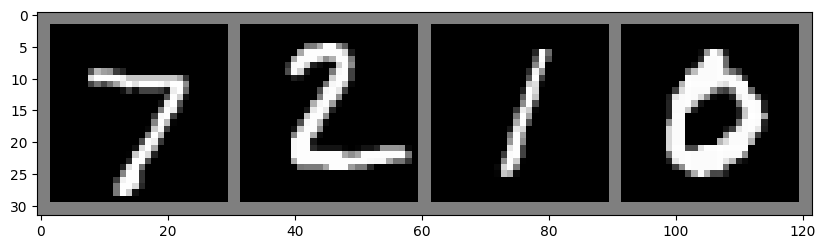

In [75]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:4]))

In [76]:
outputs = net(images)

In [77]:
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 4, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 7, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4,
        1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 9,
        5, 4, 7, 6, 7, 9, 0, 5])


In [78]:
print(''.join('{}\t'.format(str(predicted[j].numpy())) for j in range(4)))

7	2	1	0	


In [81]:
correct = 0
total = 0

with torch.no_grad():

     for data in test_loader:

         images, labels = data
         
         outputs = net(images)

         _, predicted = torch.max(outputs.data, 1)
         total += labels.size(0)
         correct += (predicted == labels).sum().item()
    
     print('accuracy: ', 100 * correct / total)

accuracy:  88.78


# **9. Set the GPU**##

* set the GPU

* make both model and data available by transfering to the GPU through `to` (very important !!)

*  `.cuda()` is possible to load.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

plt.style.use('default')

- set the GPU

In [2]:
torch.cuda.is_available()

True

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [4]:
device

device(type='cuda')

- load the data


In [5]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, ), (0.5, ))]) # N(0.5, 0.5^2)

trainset = torchvision.datasets.MNIST(root='./data', 
                                      train=True, 
                                      download=True, 
                                      transform=transform)

testset = torchvision.datasets.MNIST(root='./data', 
                                     train=False, 
                                     download=True, 
                                     transform=transform)

train_loader = DataLoader(trainset, 
                          batch_size=128, 
                          shuffle=True, 
                          num_workers=2)

test_loader = DataLoader(testset, 
                         batch_size=128, 
                         shuffle=False, 
                         num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



- generate the model

In [6]:
class Net(nn.Module):
      
      def __init__(self):

          super(Net, self).__init__()

          self.conv1 = nn.Conv2d(1, 6, 3)
          self.conv2 = nn.Conv2d(6, 16, 3)
          self.fc1 = nn.Linear(16 * 5 * 5, 120)
          self.fc2 = nn.Linear(120, 84)
          self.fc3 = nn.Linear(84, 10)
          
      def forward(self, x):

          x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
          x = F.max_pool2d(F.relu(self.conv2(x)), 2)
          x = x.view(-1, self.num_flat_features(x))
          x = F.relu(self.fc1(x))
          x = F.relu(self.fc2(x))
          x = self.fc3(x)

          return x
      
      def num_flat_features(self, x):

          size = x.size()[1:]
          num_features = 1
          
          for s in size:

              num_features *= s

          return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [7]:
net = Net().to(device)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
for epoch in tqdm(range(3)):

    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):

        inputs, labels = data[0].to(device), data[1].to(device) # transfer to the GPU

        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:

           print('Epoch: {}, Iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
           
           running_loss = 0.0

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1, Iter: 100, Loss: 0.11505273926258087
Epoch: 1, Iter: 200, Loss: 0.11476721596717834
Epoch: 1, Iter: 300, Loss: 0.11445609807968139
Epoch: 1, Iter: 400, Loss: 0.11395654571056366


 33%|███▎      | 1/3 [00:24<00:49, 24.93s/it]

Epoch: 2, Iter: 100, Loss: 0.11244202888011932
Epoch: 2, Iter: 200, Loss: 0.11014663958549499
Epoch: 2, Iter: 300, Loss: 0.10430404549837112
Epoch: 2, Iter: 400, Loss: 0.08866448831558228


 67%|██████▋   | 2/3 [00:43<00:21, 21.26s/it]

Epoch: 3, Iter: 100, Loss: 0.04256613859534263
Epoch: 3, Iter: 200, Loss: 0.0304091078042984
Epoch: 3, Iter: 300, Loss: 0.025544204235076903
Epoch: 3, Iter: 400, Loss: 0.02161347012221813


100%|██████████| 3/3 [00:59<00:00, 19.96s/it]


In [10]:
correct = 0
total = 0

with torch.no_grad():

     for data in test_loader:

         images, labels = data[0].to(device), data[1].to(device) # transfer to the GPU
         
         outputs = net(images)

         _, predicted = torch.max(outputs.data, 1)
         total += labels.size(0)
         correct += (predicted == labels).sum().item()
    
     print('accuracy: ', 100 * correct / total)

accuracy:  89.4


# **10. References**

[1] [video link](https://www.youtube.com/watch?v=IwLOWwrz26w&list=PL7ZVZgsnLwEEIC4-KQIchiPda_EjxX61r&index=4)